Shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394

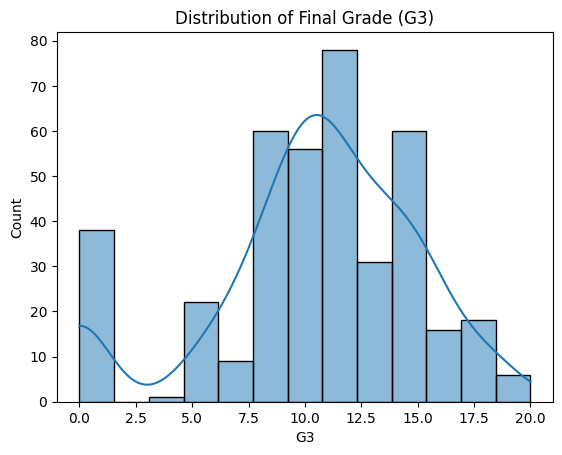

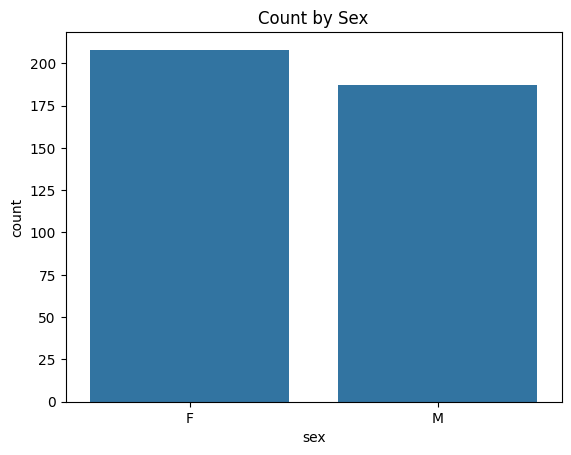

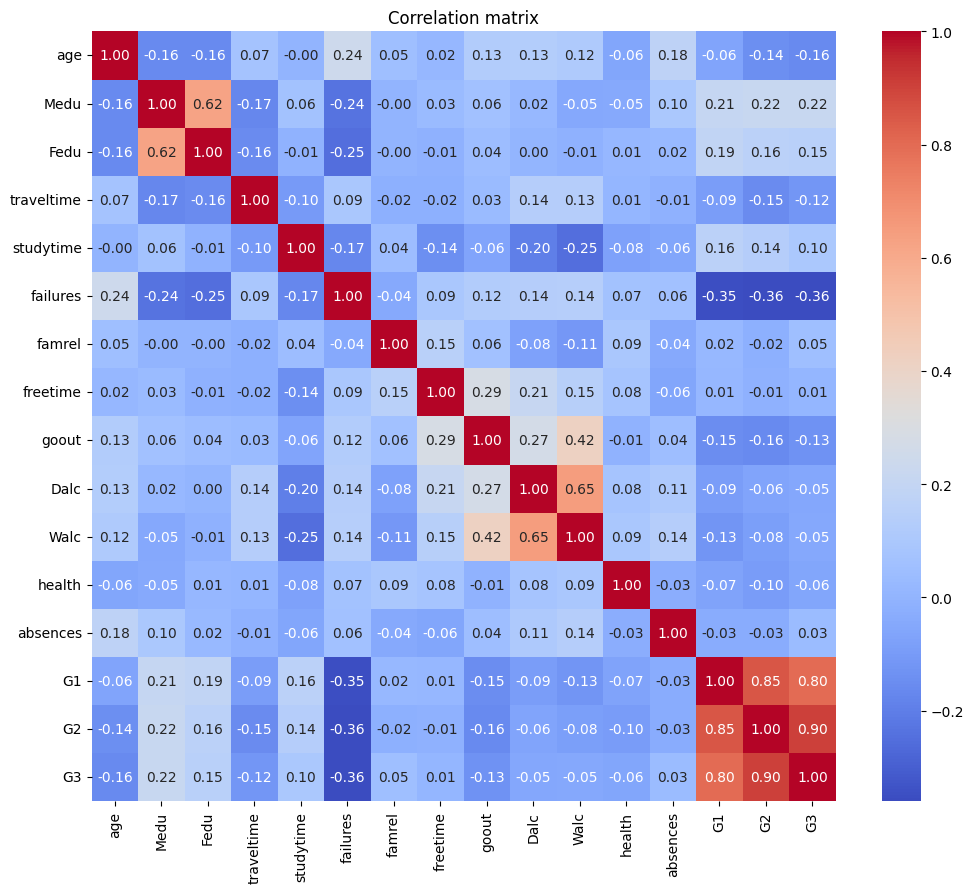

Regression MAE: 1.2137974683544304
Regression RMSE: 2.0088270398293044
R2 Score: 0.8032003524208421


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           5       0.00      0.00      0.00         4
           6       1.00      0.17      0.29         6
           7       0.00      0.00      0.00         1
           8       0.18      0.33      0.24         6
           9       0.00      0.00      0.00         5
          10       0.44      0.64      0.52        11
          11       0.33      0.60      0.43         5
          12       0.00      0.00      0.00         5
          13       0.50      0.40      0.44         5
          14       0.33      0.50      0.40         6
          15       0.36      0.40      0.38        10
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         3
          18       0.25      1.00      0.40         1
          19       0.00      0.00      0.00         2

    accuracy                           0.33        79
   macro avg       0.24   

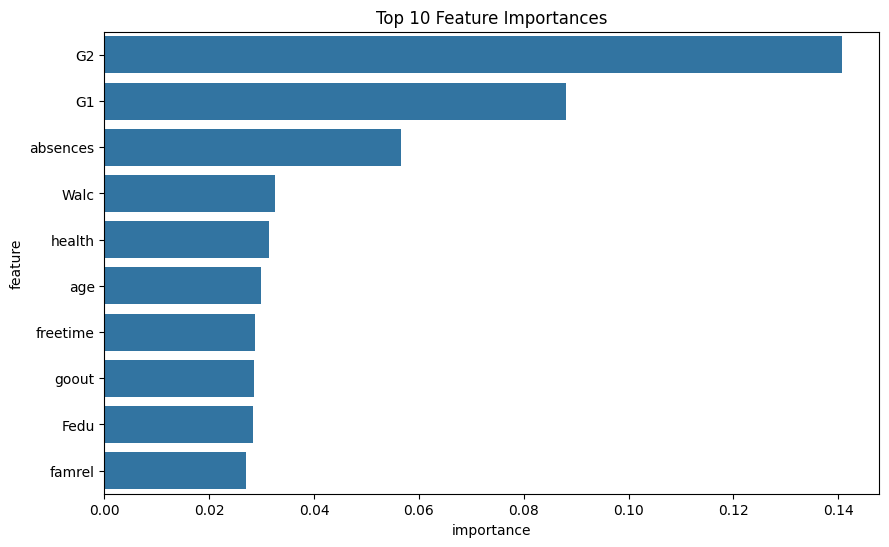

In [ ]:
# student_performance_prediction.py

# 0. Imports & setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For classification/regression models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

import joblib  # for saving models

# 1. Load dataset
# Adjust path to your file
df = pd.read_csv("student-mat.csv", delimiter=';')
print("Shape:", df.shape)
print(df.head())

# 2. Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Example: plot distribution of a numeric variable
sns.histplot(df['G3'], kde=True)  # Change 'G3' to your target if regression
plt.title("Distribution of Final Grade (G3)")
plt.show()

# Example: categorical count
sns.countplot(x='sex', data=df)
plt.title("Count by Sex")
plt.show()

# Correlation heatmap for numeric features
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

# 3. Pre-processing & Feature Engineering
# Example: create a drop-out risk flag if you do classification
# df['dropout_flag'] = np.where(df['G3'] < some_threshold, 1, 0)

# Define features & target
# For regression:
target = 'G3'
# For classification:
# target = 'dropout_flag'

features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: numeric & categorical pipelines
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object','category']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Model selection & training
# You can choose based on regression vs classification

# Example: regression pipeline
regressor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)

print("Regression MAE:", mean_absolute_error(y_test, y_pred_reg))
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_reg)))
print("R2 Score:", r2_score(y_test, y_pred_reg))

# Example: classification pipeline
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

classifier.fit(X_train, y_train)
y_pred_clf = classifier.predict(X_test)
# y_prob_clf = classifier.predict_proba(X_test)[:,1] # Removed ROC-AUC calculation

print(classification_report(y_test, y_pred_clf, zero_division=0))
# print("ROC-AUC:", roc_auc_score(y_test, y_prob_clf)) # Removed ROC-AUC calculation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf))

# 5. Feature Importance (for tree-based model)
model = classifier.named_steps['classifier']
feature_names = list(numeric_features) + list(classifier.named_steps['preprocessor']. \
                   named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()

# 6. Save your model
joblib.dump(regressor, "student_perf_regressor.pkl")
joblib.dump(classifier, "student_perf_classifier.pkl")

# 7. (Optional) Deployment stub: simple input → prediction
def predict_new(data_dict, mode='classification'):
    df_new = pd.DataFrame([data_dict])
    
    if mode=='classification':
        pred = classifier.predict(df_new)
        prob = classifier.predict_proba(df_new)[:,1]
        return pred[0], prob[0]
    else:
        pred = regressor.predict(df_new)
        return pred[0]

# Example usage:
# new_student = {'sex':'F', 'age':17, 'studytime':2, …}
# print(predict_new(new_student, mode='classification'))